In [627]:
import pandas as pd

In [628]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [629]:
df.shape

(13320, 9)

In [630]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [631]:
df['society'].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [632]:
df_modified = df.drop(['society','availability','area_type','balcony'],axis=1).copy()
df_modified.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [633]:
df_modified.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [634]:
df_modified['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [635]:
df_modified['bath'] = df_modified['bath'].fillna(2)
df_modified.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [636]:
df_modified['size'] = df_modified['size'].fillna('2 BHK')
df_modified.isnull().sum()

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [637]:
df_modified = df_modified.dropna()

In [638]:
df_modified['bhk'] =    df_modified['size'].apply(lambda x: int(x.split(' ')[0]))
df_modified.drop('size',axis=1)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [639]:
def converter(x):
    try:
        if '-' in x:
            return (float(x.split('-')[0]) + float(x.split('-')[1]))/2
        else:
            return float(x)
    except:
        return x

In [640]:
df_modified['total_sqft'] = df_modified['total_sqft'].apply(converter)

In [641]:
def condition(x):
    return type(x)
        

In [642]:
df_modified['condition'] = df_modified['total_sqft'].apply(condition)
df_modified

,location,size,total_sqft,bath,price,bhk,condition
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,<class 'float'>
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,<class 'float'>
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,<class 'float'>
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,<class 'float'>
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,<class 'float'>
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,<class 'float'>
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,<class 'float'>
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,<class 'float'>
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,<class 'float'>


In [643]:
df_filtered = df_modified[~(df_modified['condition'] == str)]
df_filtered = df_filtered.drop(['condition','size'],axis=1).copy()
df_filtered['price/sqft'] = (df_filtered['price']*100000/df_filtered['total_sqft'])
df_filtered['price/sqft'] = df_filtered['price/sqft'].apply(lambda x: round(x,2))
df_filtered.head(5)

,location,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


In [644]:
location = df_filtered.groupby('location')['location'].agg('count').sort_values(ascending=False)
location

location
Whitefield             538
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         271
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1299, dtype: int64

In [645]:
location_less = location[location <= 10]

In [646]:
df_filtered['location'] = df_filtered['location'].apply(lambda x: 'Other' if x in location_less else x)
df_filtered

,location,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.83
13316,Other,3600.0,5.0,400.00,4,11111.11
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.55
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.34


In [647]:
len(df_filtered['location'].unique())

241

In [648]:
df_filtered[df_filtered['total_sqft']/df_filtered['bhk'] < 300].head()

,location,total_sqft,bath,price,bhk,price/sqft
9,Other,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.98
68,Other,1350.0,7.0,85.0,8,6296.30
70,Other,500.0,3.0,100.0,3,20000.00


In [649]:
len(df_filtered[df_filtered['total_sqft']/df_filtered['bhk'] < 300])

744

In [650]:
df_without_outliers = df_filtered[~(df_filtered['total_sqft']/df_filtered['bhk'] < 300)]
df_without_outliers.shape

(12529, 6)

In [651]:
df_without_outliers['price/sqft'].describe()

count     12529.000000
mean       6304.053515
std        4162.395847
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price/sqft, dtype: float64

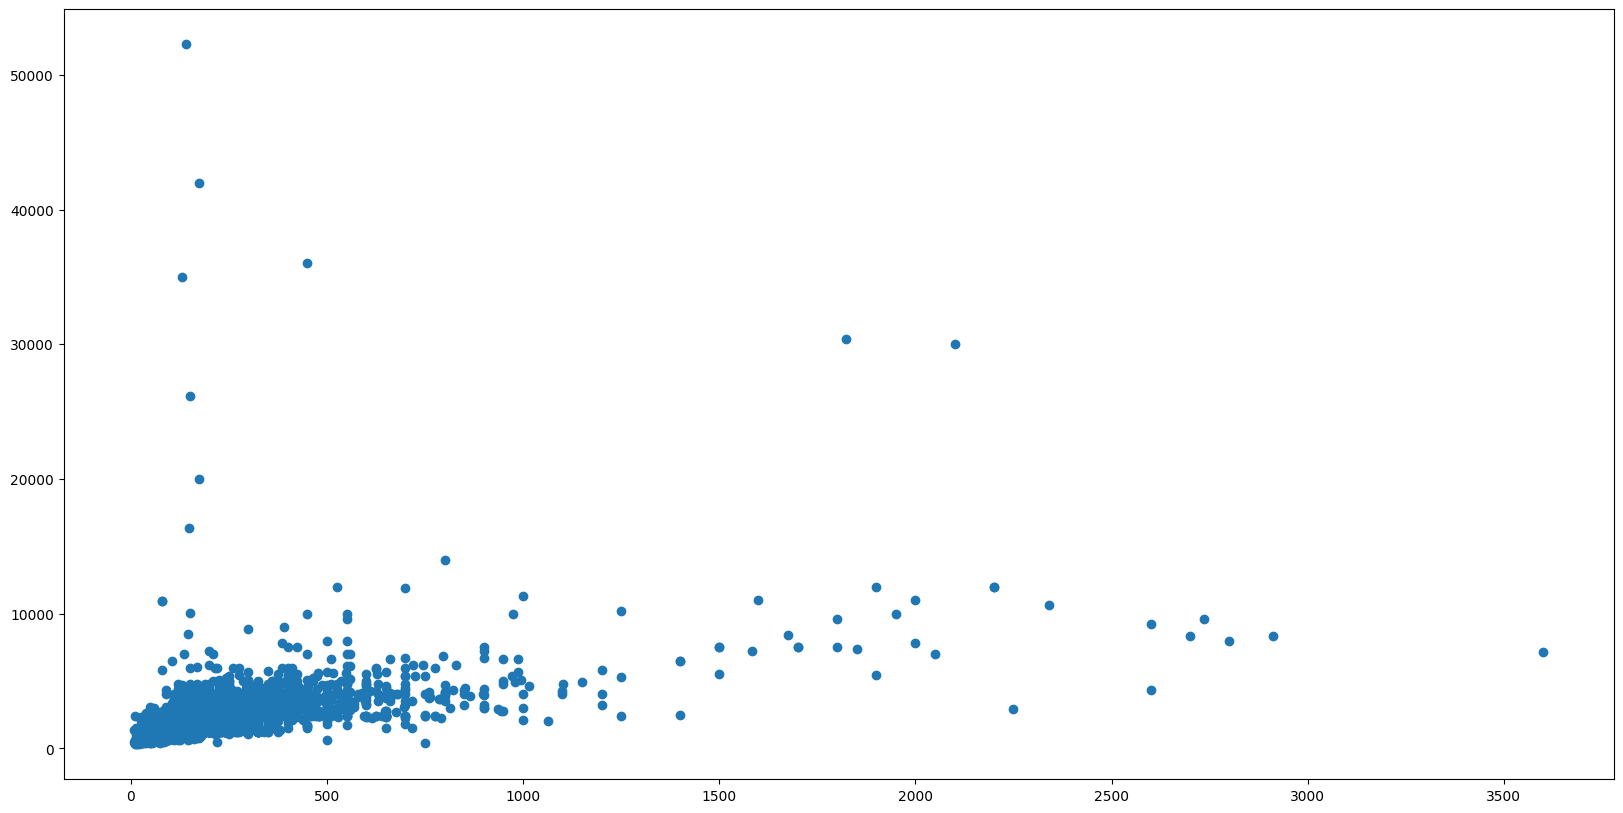

In [652]:
import matplotlib.pyplot as plt
plt.scatter(df_without_outliers['price'],df_without_outliers['total_sqft'])

In [653]:
import numpy as np

In [654]:
def otliner_destroyer(Data_frame):
    df_out = pd.DataFrame()
    grouped = Data_frame.groupby('location')
    for location, location_df in grouped:
        m = np.mean(location_df['price/sqft'])
        st = np.std(location_df['price/sqft'])
        reduced_df = location_df[(location_df['price/sqft'] > (m - st)) & (location_df['price/sqft'] <= (m + st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [655]:
df_without_outliers = otliner_destroyer(df_without_outliers)
df_without_outliers

,location,total_sqft,bath,price,bhk,price/sqft
0,Devarachikkanahalli,1250.0,2.0,44.00,3,3520.00
1,Devarachikkanahalli,1250.0,2.0,40.00,2,3200.00
2,Devarachikkanahalli,1200.0,2.0,83.00,2,6916.67
3,Devarachikkanahalli,1170.0,2.0,40.00,2,3418.80
4,Devarachikkanahalli,1425.0,2.0,65.00,3,4561.40
...,...,...,...,...,...,...
10299,Yeshwanthpur,1676.0,3.0,92.13,3,5497.02
10300,Yeshwanthpur,2503.0,3.0,138.00,3,5513.38
10301,Yeshwanthpur,1855.0,3.0,135.00,3,7277.63
10302,Yeshwanthpur,1876.0,3.0,160.00,3,8528.78


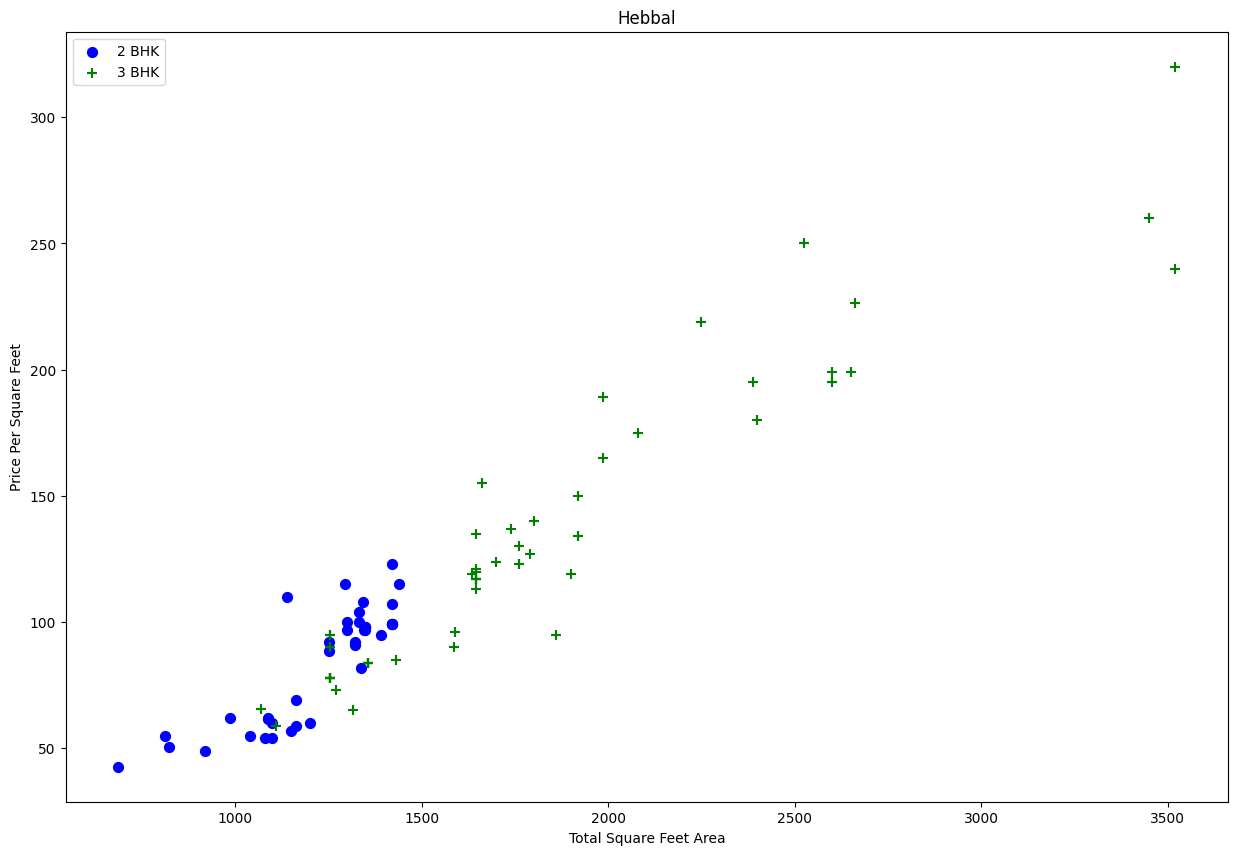

In [656]:
import matplotlib


def plot_scatter_location(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label= '2 BHK',s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],color='green',label= '3 BHK',s=50,marker = '+')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()
    
plot_scatter_location(df_without_outliers,"Hebbal")

In [657]:
def remove_bhk_outliners(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price/sqft']),
                'std' : np.std(bhk_df['price/sqft']),
                'count' : bhk_df.shape[0]
            }
    
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df['price/sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)            
    

In [658]:
df_without_outliers = remove_bhk_outliners(df_without_outliers)

In [659]:
df_without_outliers.shape

(7360, 6)

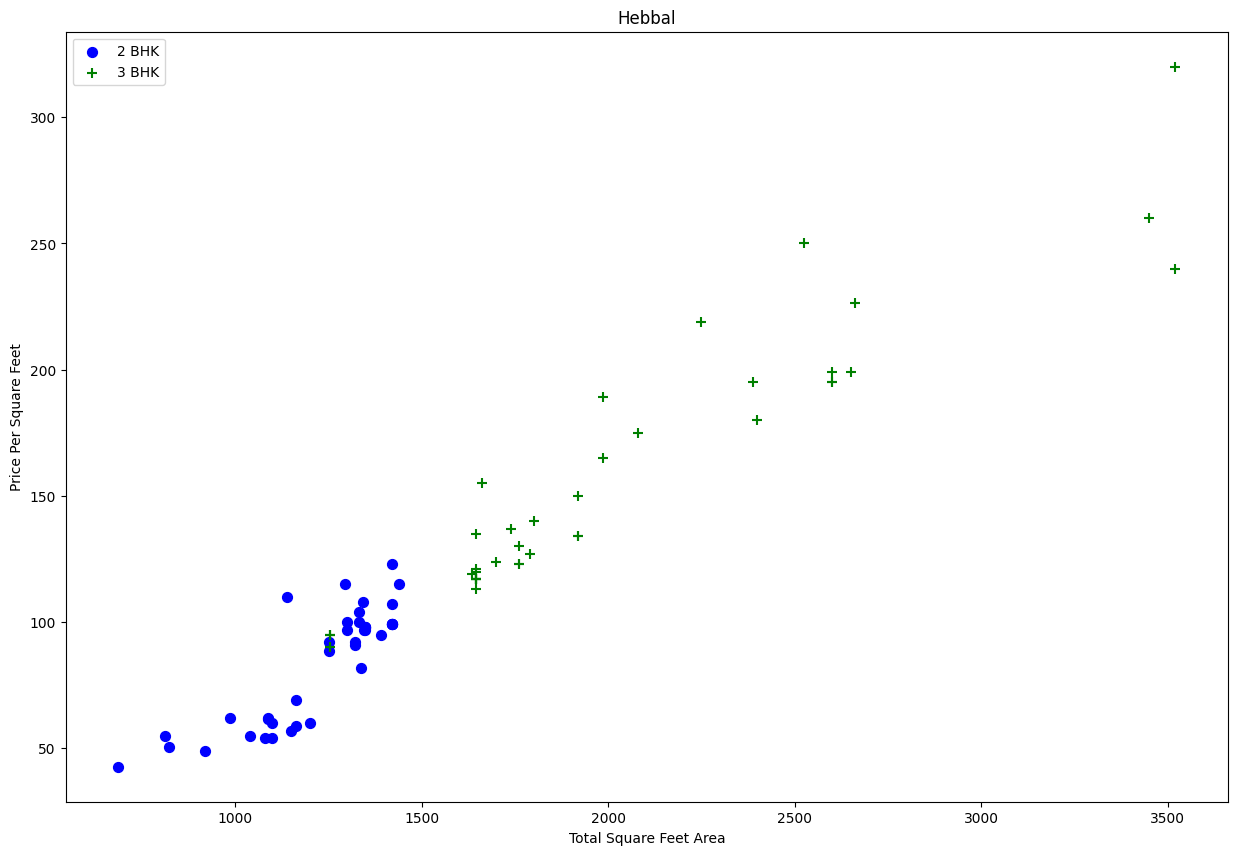

In [660]:
plot_scatter_location(df_without_outliers,"Hebbal")

Text(0, 0.5, 'Count')

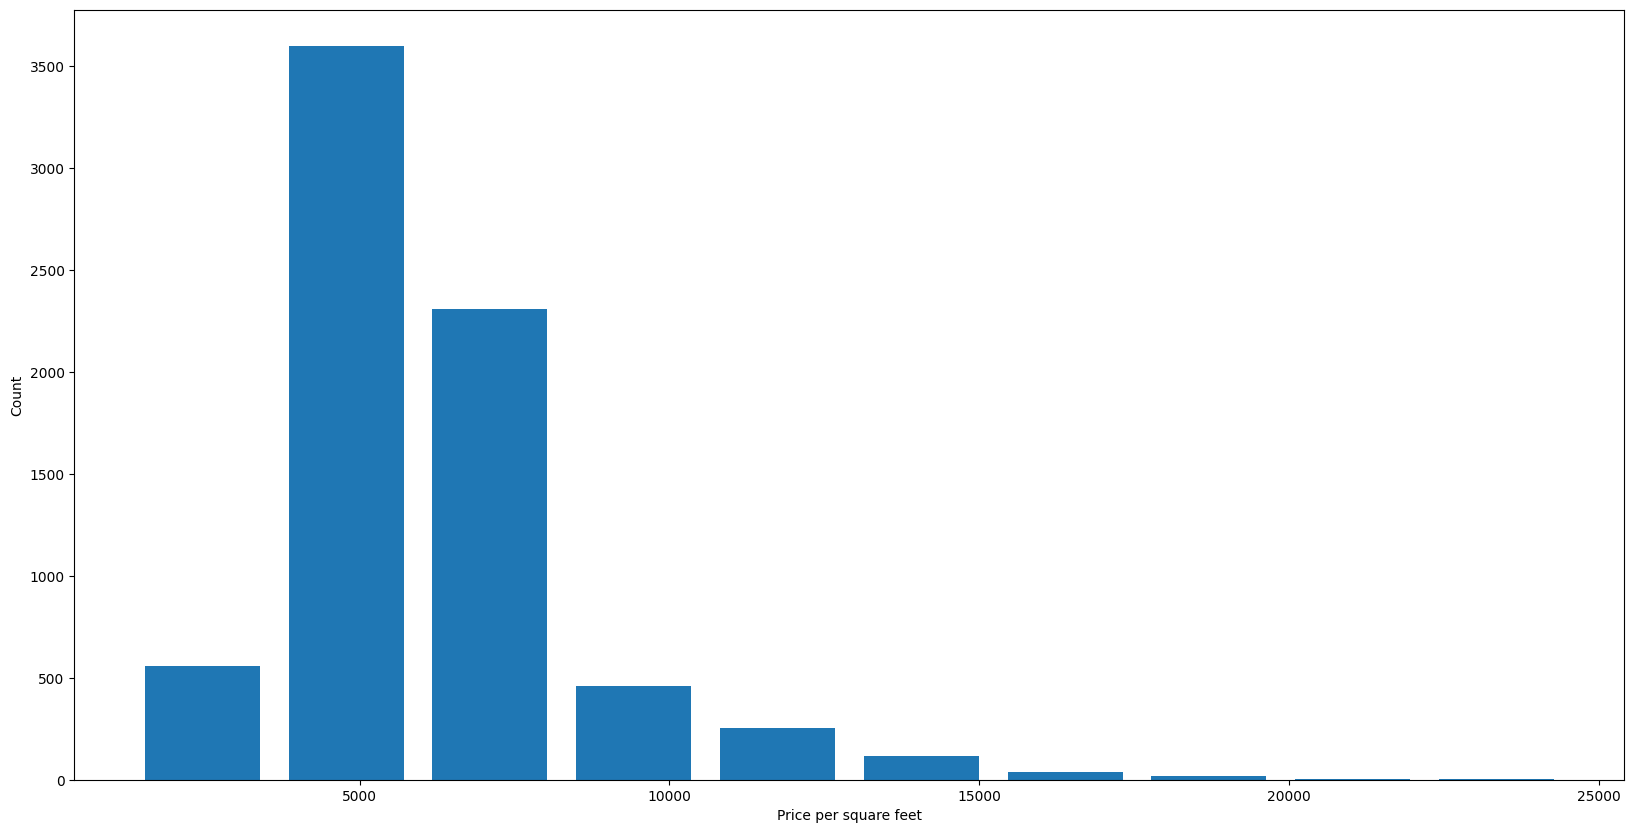

In [661]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df_without_outliers['price/sqft'],rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

In [662]:
df_without_outliers

,location,total_sqft,bath,price,bhk,price/sqft
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.00
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.67
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.80
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.40
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.65
...,...,...,...,...,...,...
10293,Yeshwanthpur,1195.0,2.0,100.0,2,8368.20
10294,Yeshwanthpur,1692.0,3.0,108.0,3,6382.98
10296,Yeshwanthpur,2500.0,5.0,185.0,6,7400.00
10301,Yeshwanthpur,1855.0,3.0,135.0,3,7277.63


In [663]:
df_without_outliers['bath'].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [664]:
df_without_outliers = df_without_outliers[df_without_outliers['bath'] < df_without_outliers['bhk'] + 2]

In [665]:
df_shorted = df_without_outliers.drop(['price/sqft'],axis=1).copy()
df_shorted.head(5)


,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [666]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder_data = df_shorted[['location']].copy()
encoded = encoder.fit_transform(encoder_data)
encoded = encoded.toarray()
columns = encoder.get_feature_names_out()
final_columns = [name.split('_')[1] for name in columns]
encoded = pd.DataFrame(encoded,columns=final_columns)
encoded.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [667]:
df_shorted = df_shorted.drop('location',axis=1)
encoded = encoded.drop('Yeshwanthpur',axis=1)

In [668]:
df_shorted = df_shorted.reset_index()

In [669]:
df_final = pd.concat([df_shorted,encoded],axis=1)

In [670]:
df_final

,index,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,1,1250.0,2.0,40.0,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1200.0,2.0,83.0,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1170.0,2.0,40.0,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1425.0,2.0,65.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,947.0,2.0,43.0,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7276,10293,1195.0,2.0,100.0,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7277,10294,1692.0,3.0,108.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7278,10296,2500.0,5.0,185.0,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7279,10301,1855.0,3.0,135.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [671]:
X = df_final.drop('price',axis=1)
y = df_final['price']

In [672]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [673]:
from sklearn.linear_model import LinearRegression

In [674]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8454801736099122

In [675]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [676]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state = 0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.78543154, 0.80582912, 0.84245363, 0.85484281, 0.84719433])

In [677]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [678]:
def find_best(X,y):
    parameters = {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {}
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'DecisionTreeRegressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for name,config in parameters.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model','best_score','best_params'])    
    

In [679]:
find_best(X,y)

,model,best_score,best_params
0,LinearRegression,0.827150,{}
1,Lasso,0.692342,"{'alpha': 1, 'selection': 'cyclic'}"
2,DecisionTreeRegressor,0.775619,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [680]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_model.predict([x])[0]

In [681]:
predict_price('Indira Nagar',1000,2,2)

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


108.84762398774497

In [682]:
predict_price('1st Phase JP Nagar',1000,3,3)

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


17.78146707487043

In [683]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as file:
    pickle.dump(lr_model,file)

In [684]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as file:
    file.write(json.dumps(columns))